<a href="https://colab.research.google.com/github/axiao23/Sentinel2--Applications-to-Farming/blob/main/Data%20Manipulation/Manhattan/ManhattanDataNVDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount my google drive into colab to access manhattan data
#mount my google drive into colab to access manhattan data
from google.colab import drive
drive.mount('/content/drive')
#ive identified that these two images/bands provide the best picture for manhattan
file_pathBO4 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHB04_1.jp2'
file_pathBO8 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHBO8_1.jp2'

In [5]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
#checking the dimensions of the two images:
# Open a JP2 file
#loading in the red band
with rasterio.open(file_pathBO4) as dataset:
    # Read the first band as a NumPy array
    image_data1 = dataset.read(1)

# Open a JP2 file
#loading in the infared red band
with rasterio.open(file_pathBO8) as dataset:
    # Read the first band as a NumPy array
    image_data2 = dataset.read(1)
width = image_data1.shape[0]
height = image_data1.shape[1]
width2 = image_data2.shape[0]
height2 = image_data2.shape[1]

print(f"The red band resolution is: {width}x{height}")
print(f"The infared red band resolution is: {width2}x{height2}")

The red band resolution is: 10980x10980
The infared red band resolution is: 10980x10980


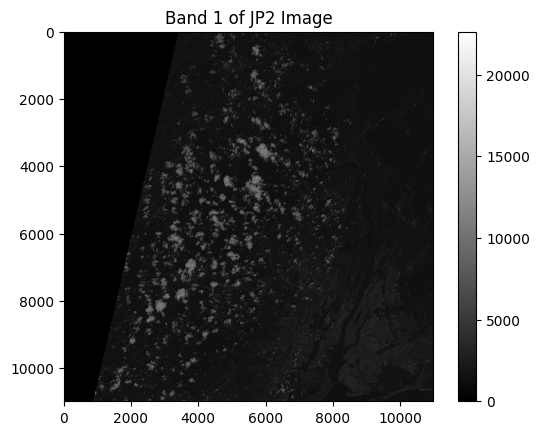

In [ ]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
with rasterio.open(file_pathBO4) as dataset:
    # Read the first band as a NumPy array
    image_data = dataset.read(1)
# Plot the image data (first band)
plt.imshow(image_data, cmap='gray')
plt.title("Band 1 of JP2 Image")
plt.colorbar()
plt.show()



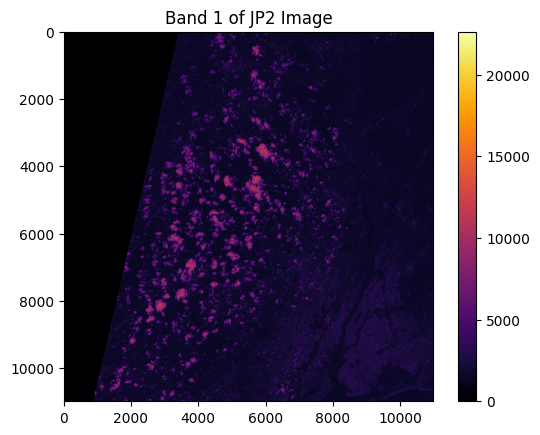

<ipython-input-6-71681c7fcdfc>:43: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


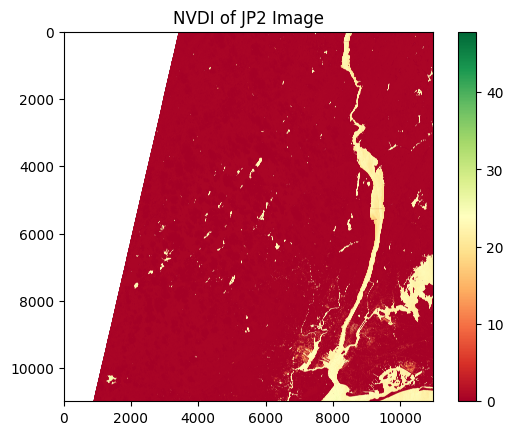

In [ ]:
#importing and loading the infared red and red bands (band 5 and band 4 respectively @ 20m)
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

file_pathBO4 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHB04_1.jp2'
file_pathBO8 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHBO8_1.jp2'

# Open a JP2 file
#loading in the red band
with rasterio.open(file_pathBO4) as dataset:
    # Read the first band as a NumPy array
    image_data1 = dataset.read(1)

# Open a JP2 file
#loading in the infared red band
with rasterio.open(file_pathBO8) as dataset:
    # Read the first band as a NumPy array
    image_data2 = dataset.read(1)

# Plot the image using a color map (e.g., 'viridis', 'plasma', 'inferno')
plt.imshow(image_data1, cmap='inferno')
plt.title("Band 1 of JP2 Image")
plt.colorbar()
plt.show()



# Now both red_band and resized_nir_band have the same shape
'''print(image_data1)
print(image_data2)
print(len(image_data1))'''
#calculating the NVDI for the bands which make up the red and the infared red
red = image_data1
nir = image_data2

# Example: Assuming red_band is smaller (5490, 5490) and nir_band is larger (10980, 10980)
#resized_red_band = scipy.ndimage.zoom(red, (nir.shape[0] / red.shape[0],
                                                #nir.shape[1] / red.shape[1]), order=3)
#ndvi = (nir - resized_red_band)/ (nir + resized_red_band)
ndvi = (nir - red) / (nir + red)

#plot the NVDI
plt.imshow(ndvi, cmap='RdYlGn')
plt.title("NVDI of JP2 Image")
plt.colorbar()
plt.show()

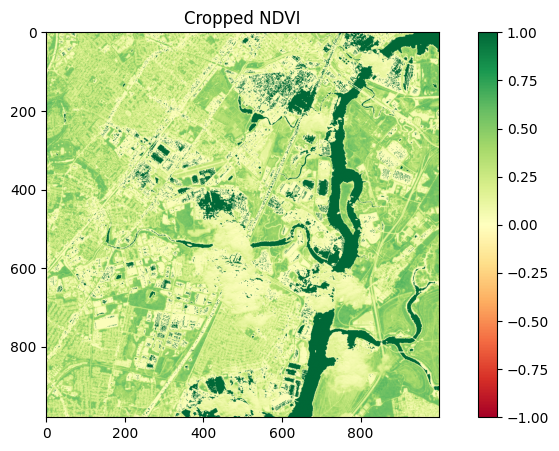

In [18]:
# prompt: how to crop an image

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

file_pathBO4 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHB04_1.jp2'
file_pathBO8 = '/content/drive/MyDrive/Sentinel2-Project/ManhattanData (06 04-07 31) 2024/S2A_MSIL1C_20240615T153941_N0510_R011_T18TWL_20240615T205800.SAFE/GRANULE/L1C_T18TWL_A046912_20240615T154123/IMG_DATA/MHBO8_1.jp2'

# Cropping and displaying a section for better visualization
min_x = 6000
min_y = 10000
max_x = 7000
max_y = 11000

with rasterio.open(file_pathBO4) as dataset:
  window = rasterio.windows.Window(min_x, min_y, max_x - min_x, max_y - min_y)
  cropped_image1 = dataset.read(1, window=window)

with rasterio.open(file_pathBO8) as dataset:
  window = rasterio.windows.Window(min_x, min_y, max_x - min_x, max_y - min_y)
  cropped_image2 = dataset.read(1, window=window)

cropped_ndvi = (cropped_image2 - cropped_image1) / (cropped_image2 + cropped_image1)

plt.figure(figsize=(10, 5))
plt.imshow(cropped_ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Cropped NDVI")
plt.colorbar()
plt.show()

